# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


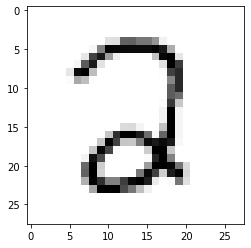

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.25420905039209396
train accuracy is: 0.6591553997663161, test accuracy is 0.688508064516129


Epoch 10 Loss 0.0738012858609798
train accuracy is: 0.9254715406442998, test accuracy is 0.9349798387096774


Epoch 20 Loss 0.048632970970084156
train accuracy is: 0.9492572191620764, test accuracy is 0.9581653225806451


Epoch 30 Loss 0.03973482275812541
train accuracy is: 0.957018861625772, test accuracy is 0.9652217741935484


Epoch 40 Loss 0.03515496819815886
train accuracy is: 0.9608579535970623, test accuracy is 0.967741935483871


Epoch 50 Loss 0.03226279366487699
train accuracy is: 0.9641128359205475, test accuracy is 0.96875


Epoch 60 Loss 0.030199656119499808
train accuracy is: 0.9660323819061927, test accuracy is 0.9692540322580645


Epoch 70 Loss 0.02861709380376367
train accuracy is: 0.9676180938073777, test accuracy is 0.969758064516129


Epoch 80 Loss 0.027358056582024132
train accuracy is: 0.9684526790185278, test accuracy is 0.969758064516129


Epoch 90 Loss 0.026304028343518516
train accuracy is: 0.9702053079619429, test accuracy is 0.9707661290322581


Epoch 100 Loss 0.02539299347315701
train accuracy is: 0.9707060590886329, test accuracy is 0.9707661290322581


Epoch 110 Loss 0.024613827716050782
train accuracy is: 0.971540644299783, test accuracy is 0.9707661290322581


Epoch 120 Loss 0.023917592556871557
train accuracy is: 0.9731263562009681, test accuracy is 0.9717741935483871


Epoch 130 Loss 0.023295773430824
train accuracy is: 0.9735436488065431, test accuracy is 0.9717741935483871


Epoch 140 Loss 0.022724174413037503
train accuracy is: 0.9741278584543482, test accuracy is 0.9717741935483871


Epoch 150 Loss 0.02220136840900505
train accuracy is: 0.9751293607077283, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.021709140704518078
train accuracy is: 0.9758804873977633, test accuracy is 0.9732862903225806


Epoch 170 Loss 0.021247742137326452
train accuracy is: 0.9767150726089133, test accuracy is 0.9727822580645161


Epoch 180 Loss 0.0208098905311136
train accuracy is: 0.9774661992989484, test accuracy is 0.9727822580645161


Epoch 190 Loss 0.020402174787960126
train accuracy is: 0.9780504089467534, test accuracy is 0.9722782258064516


Epoch 200 Loss 0.02000035599686516
train accuracy is: 0.9785511600734434, test accuracy is 0.9727822580645161


Epoch 210 Loss 0.019631094335049046
train accuracy is: 0.9788015356367885, test accuracy is 0.9727822580645161


Epoch 220 Loss 0.019264065988959998
train accuracy is: 0.9789684526790186, test accuracy is 0.9727822580645161


Epoch 230 Loss 0.01891173785286615
train accuracy is: 0.9792188282423635, test accuracy is 0.9742943548387096


Epoch 240 Loss 0.018569636713084436
train accuracy is: 0.9797195793690536, test accuracy is 0.9742943548387096


0.03473590297387111

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2363942942187113
train accuracy is: 0.7154899015189451, test accuracy is 0.7116935483870968


Epoch 10 Loss 0.10171899144623744
train accuracy is: 0.9123685528292439, test accuracy is 0.921875


Epoch 20 Loss 0.07875107493381907
train accuracy is: 0.9281422133199799, test accuracy is 0.9380040322580645


Epoch 30 Loss 0.06811900413864681
train accuracy is: 0.9373226506426307, test accuracy is 0.9495967741935484


Epoch 40 Loss 0.06168934556076217
train accuracy is: 0.9420797863461859, test accuracy is 0.953125


Epoch 50 Loss 0.05728472160488219
train accuracy is: 0.9450008345852111, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.05403548928460844
train accuracy is: 0.9475045902186613, test accuracy is 0.9586693548387096


Epoch 70 Loss 0.05151615055188418
train accuracy is: 0.9492572191620764, test accuracy is 0.9606854838709677


Epoch 80 Loss 0.04949153792744996
train accuracy is: 0.9508429310632616, test accuracy is 0.9621975806451613


Epoch 90 Loss 0.047818362348011914
train accuracy is: 0.9525955600066767, test accuracy is 0.9642137096774194


Epoch 100 Loss 0.046406247455510787
train accuracy is: 0.9528459355700217, test accuracy is 0.9652217741935484


Epoch 110 Loss 0.0451935926958816
train accuracy is: 0.9540143548656318, test accuracy is 0.9652217741935484


Epoch 120 Loss 0.044136529785607906
train accuracy is: 0.9546820230345519, test accuracy is 0.9642137096774194


Epoch 130 Loss 0.04320500607195848
train accuracy is: 0.9558504423301619, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.04237570297214625
train accuracy is: 0.956601569020197, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.04163031371328969
train accuracy is: 0.957185778668002, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.04095630727254641
train accuracy is: 0.9577699883158071, test accuracy is 0.9647177419354839


Epoch 170 Loss 0.04034198120372505
train accuracy is: 0.958103822400267, test accuracy is 0.9652217741935484


Epoch 180 Loss 0.039779590391310654
train accuracy is: 0.9581872809213821, test accuracy is 0.9657258064516129


Epoch 190 Loss 0.039261523704477976
train accuracy is: 0.9584376564847271, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.0387829266318293
train accuracy is: 0.958604573526957, test accuracy is 0.9667338709677419


Epoch 210 Loss 0.03833689613733701
train accuracy is: 0.9593557002169921, test accuracy is 0.9667338709677419


Epoch 220 Loss 0.03792166864524151
train accuracy is: 0.9595226172592222, test accuracy is 0.967741935483871


Epoch 230 Loss 0.037533980077062455
train accuracy is: 0.9597729928225672, test accuracy is 0.9672379032258065


Epoch 240 Loss 0.03716963857695132
train accuracy is: 0.9600233683859122, test accuracy is 0.9672379032258065


0.051974987234222246

### Comparing results of NN and LR

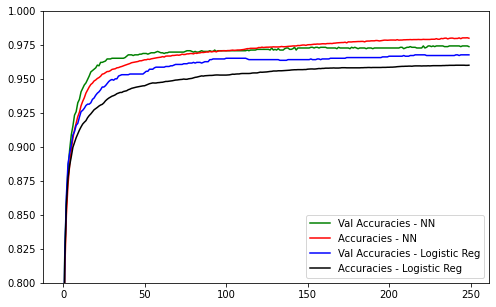

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

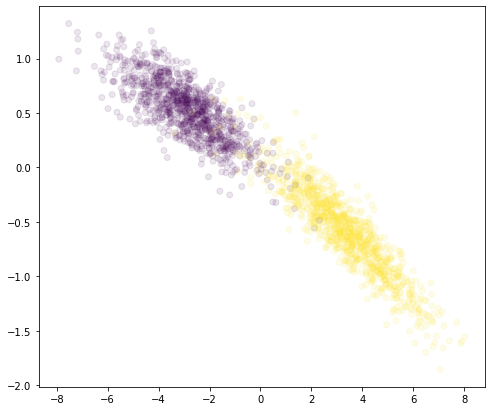

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

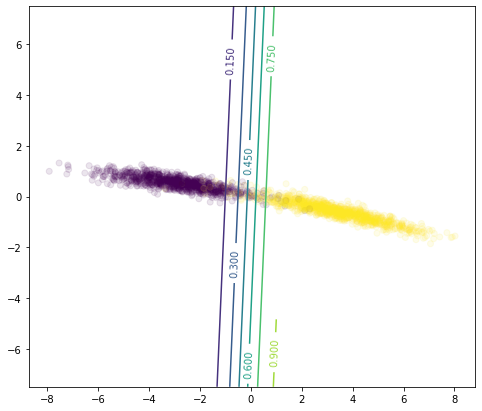

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );